In [1]:
import pandas as pd
import numpy as np
import sklearn
import shap
import time

In [2]:
pathbevoelkerung = 'shap-master/data/bevoelkerung.xls'
dfbevoelkerung = pd.read_excel(pathbevoelkerung)
dfbevoelkerung.head()
dfbevoelkerung.dropna(axis='columns')

,Stadtteil,Bevölkerung Einwohnerinnen und Einwohner 2012,Bevölkerung Durchschnittsalter 2012,Bevölkerung Einwohnerinnen und Einwohner unter 18 Jahren in % 2012,Bevölkerung Einwohnerinnen und Einwohner von 18 bis 64 Jahren in % 2012,Bevölkerung Einwohnerinnen und Einwohner ab 65 Jahren in % 2012,Bevölkerung Ausländerinnen und Ausländer in % 2012,Bevölkerung Deutsche mit Migrationshintergrund in % 2012,Bevölkerung Einwohnerentwicklung (5-Jahresvergleich) 2012,Bevölkerung Einpersonenhaushalte in % 2012,Bevölkerung Familien mit Kindern in % 2012
0,Altstadt,3601,43.4,10.1,73.0,17.0,34.823660,20.2,5.2,66.7,10.4
1,Innenstadt,6334,41.6,9.0,76.5,14.5,43.242817,17.9,4.0,71.3,8.1
2,Bahnhofsviertel,3117,37.5,7.7,85.6,6.6,52.293872,12.0,25.5,71.6,7.3
3,Westend-Süd,17076,40.7,14.4,70.5,15.2,23.735067,17.3,5.8,62.4,13.9
4,Westend-Nord,9083,40.0,15.9,69.0,15.1,25.454145,21.9,12.1,55.3,17.0
5,Nordend-West,28262,41.2,13.0,72.5,14.5,19.627061,15.3,6.3,63.0,13.2
6,Nordend-Ost,25410,40.7,12.5,75.2,12.3,21.090122,15.6,4.0,65.4,13.0
7,Ostend,26540,42.5,11.7,71.9,16.4,27.848531,18.8,4.7,62.6,12.5
8,Bornheim,26105,43.2,12.9,69.0,18.2,22.731278,18.2,4.6,62.0,13.8
9,Gutleutviertel,5952,41.1,11.1,74.0,14.9,37.567204,18.3,3.4,66.1,10.1


In [3]:
from sklearn.model_selection import train_test_split
#setting y as the target variabl
y_data = dfbevoelkerung['Bevölkerung Ausländerinnen und Ausländer in %  2012']
#Seperating the target from the features
x_data=dfbevoelkerung[['Bevölkerung Durchschnittsalter  2012','Bevölkerung Einwohnerinnen und Einwohner  2012'
                       ,'Bevölkerung Einwohnerinnen und Einwohner unter 18 Jahren in %  2012'
                       ,'Bevölkerung Einpersonenhaushalte in %  2012'
                       ,'Bevölkerung Familien mit Kindern in %  2012'
                       ,'Bevölkerung Einwohnerentwicklung (5-Jahresvergleich)  2012']]
#Splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(x_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(x_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

In [4]:
from sklearn import linear_model
#LinearRegression fits a linear model 
lin_regr = linear_model.LinearRegression()
lin_regr.fit(x_train, y_train)

print_accuracy(lin_regr.predict)

Root mean squared test error = 6.478893091266041


In [6]:
def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(x_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

In [7]:
#to explain the output of any machine learning model
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(x_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, x_test.iloc[0,:])

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

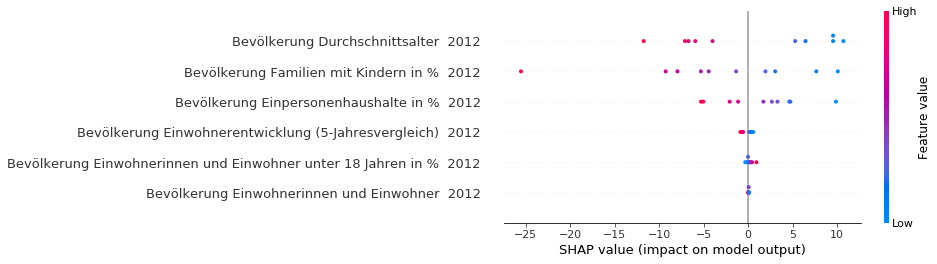

In [8]:
shap_values = ex.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

Root mean squared test error = 5.77768575714824


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


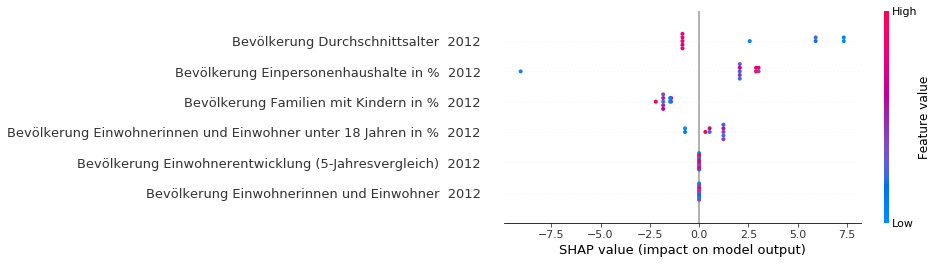

In [9]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(x_train, y_train)
print_accuracy(dtree.predict)

# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

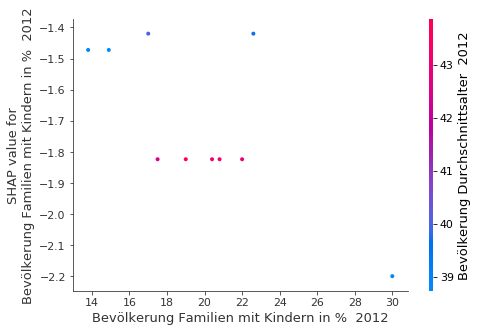

In [10]:
# The first argument is the index of the feature we want to plot
# The second argument is the matrix of SHAP values (it is the same shape as the data matrix)
# The third argument is the data matrix (a pandas dataframe or numpy array)
shap.dependence_plot(4, shap_values, x_test)

In [11]:
shap.force_plot(ex.expected_value, shap_values, x_test)

Root mean squared test error = 5.548380147276337


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


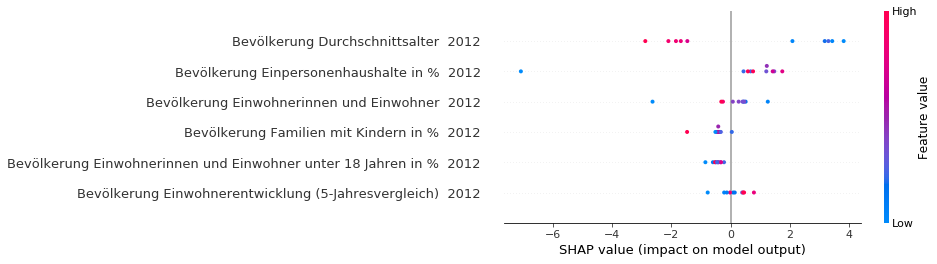

In [12]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(x_train, y_train)
print_accuracy(rforest.predict)

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

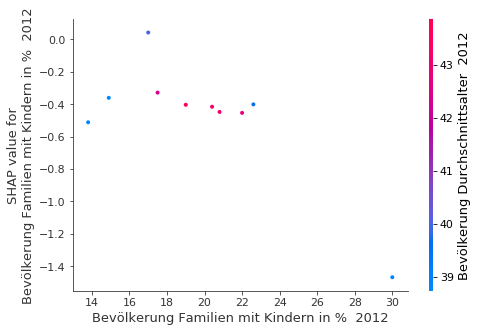

In [13]:
shap.dependence_plot(4, shap_values, x_test)


In [14]:
shap.force_plot(explainer.expected_value, shap_values, x_test)

Root mean squared test error = 7.567129963845233


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

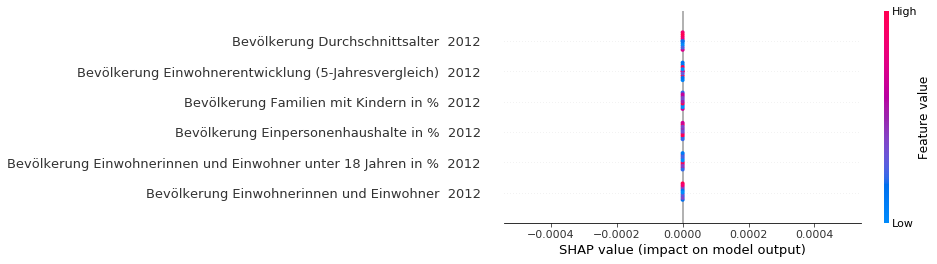

In [15]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(x_train, y_train)
print_accuracy(nn.predict)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict, X_train_summary)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

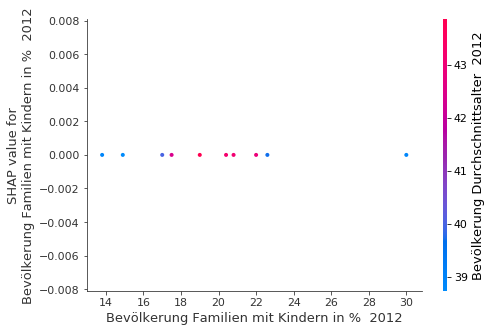

In [16]:
shap.dependence_plot(4, shap_values, x_test)

In [17]:
shap.force_plot(explainer.expected_value, shap_values, x_test)